In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

(240, 640, 3)


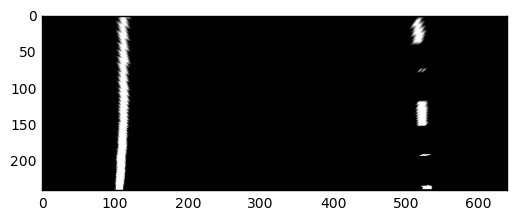

In [80]:
img = cv2.imread('test_images/output/straight_lines1.png')
print(img.shape)
plt.imshow(img)

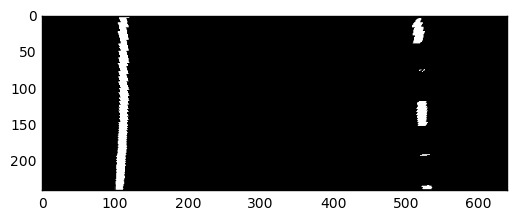

In [81]:
#create binary image
img[(img < 127)]=0
img[(img >= 127)]=255
plt.imshow(img)

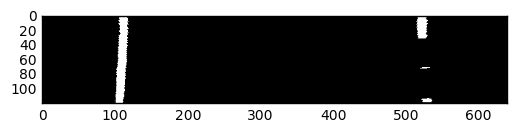

In [82]:
base_width = img.shape[0]//2
base_strip = img[base_width:, :, 0]
plt.imshow(base_strip, cmap="gray")

108 523


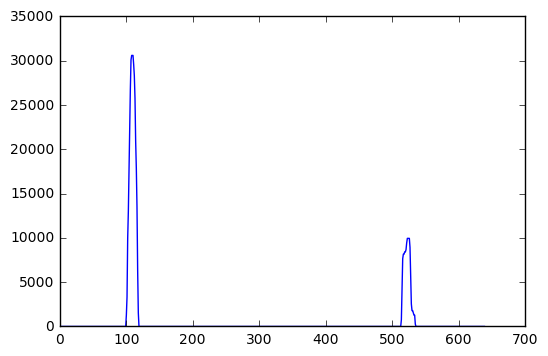

In [83]:
#find peaks in the base strip
histogram = np.sum(base_strip, 0, dtype=np.int)
plt.plot(histogram)
midpoint = len(histogram)//2
left_lane_base = np.argmax(histogram[:midpoint])
right_lane_base = np.argmax(histogram[midpoint:]) + midpoint
print(left_lane_base, right_lane_base)

In [106]:
window_height = 24
window_width = 25 #area = 30*240/10
num_white = 30 * (img.shape[0]/num_strips) * 0.5

(240, 0)

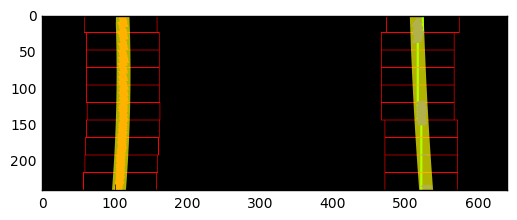

In [141]:
out_img = np.copy(img)
plt.imshow(out_img)

left_lane = []
right_lane = []

left_current_x = left_lane_base
right_current_x = right_lane_base

nonzero = img.nonzero()
nonzero_y = np.array(nonzero[0])
nonzero_x = np.array(nonzero[1])

for strip in range(0, img.shape[0], window_height):
    #points = (x,y)
    left_win_p1 = (left_current_x - window_width, strip + window_height)
    left_win_p2 = (left_current_x + window_width, strip)
    right_win_p1 = (right_current_x - window_width, strip + window_height)
    right_win_p2 = (right_current_x + window_width, strip)
    
    cv2.line(out_img, (left_current_x, strip + window_height), (left_current_x, strip ), color = (0, 255, 0), thickness=2)
    cv2.line(out_img, (right_current_x, strip + window_height), (right_current_x, strip ), color = (0, 255, 0), thickness=2)
    
    
    #find pixels that belong to lanes
    left_lane_indices = ((nonzero_x >= left_win_p1[0]) & (nonzero_x < left_win_p2[0]) &\
    (nonzero_y < left_win_p1[1]) & (nonzero_y >= left_win_p2[1])).nonzero()[0]
    
    right_lane_indices = ((nonzero_x >= right_win_p1[0]) & (nonzero_x < right_win_p2[0]) &\
    (nonzero_y < right_win_p1[1]) & (nonzero_y >= right_win_p2[1])).nonzero()[0]
    
    #we found the pixels, now add them to a growing list
    left_lane.append(left_lane_indices)
    right_lane.append(right_lane_indices)
    
    #if they pixels we found are good enough in number, use this new value to slide window
    if (len(left_lane_indices) >  num_white):
        left_current_x = np.int(np.mean(nonzero_x[left_lane_indices]))
    
    if (len(right_lane_indices) >  num_white):
        right_current_x = np.int(np.mean(nonzero_x[right_lane_indices]))
    
        
    
    
    cv2.rectangle(out_img, left_win_p1, left_win_p2, color=(255, 0, 0))
    cv2.rectangle(out_img, right_win_p1, right_win_p2, color=(255, 0, 0))
    #left_window = out_img[]
    #left_non_zero_x = 
    plt.imshow(out_img)

#each lane has some n (n<= imageheigt/windowheight lists of non zero pixels. concatenate to get x,y and then model lines)
left_lane = np.concatenate(left_lane)
right_lane = np.concatenate(right_lane)

leftx = nonzero_x[left_lane]
lefty = nonzero_y[left_lane] 
rightx = nonzero_x[right_lane]
righty = nonzero_y[right_lane] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


# Generate x and y values for plotting
ploty = np.linspace(0, out_img.shape[0]-1, out_img.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzero_y[left_lane], nonzero_x[left_lane]] = [255, 0, 0]
out_img[nonzero_y[right_lane], nonzero_x[right_lane]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow', linewidth=10, alpha=0.7)
plt.plot(right_fitx, ploty, color='yellow', linewidth=10, alpha=0.7)
plt.xlim(0, 640)
plt.ylim(240, 0)

In [127]:
((nonzero_x >= left_win_p1[0])).nonzero()

(array([    0,     1,     2, ..., 11265, 11266, 11267]),)

In [118]:
nonzero_y

array([  0,   0,   0, ..., 239, 239, 239])